In [1]:
from datetime import datetime
import os
os.chdir('..')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import datajoint as dj
from pipeline import (reference, subject, acquisition, stimulation, analysis,
                      intracellular, extracellular, behavior, utilities)

Connecting root@127.0.0.1:3306


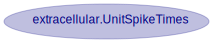

In [3]:
dj.ERD(extracellular.UnitSpikeTimes)

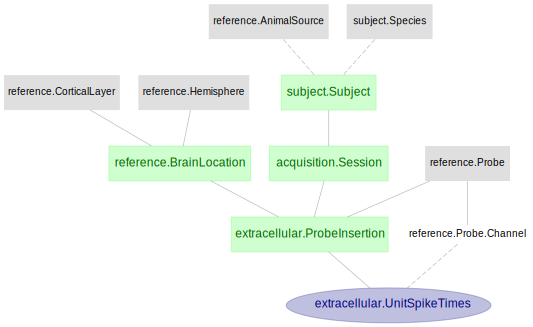

In [4]:
dj.ERD(extracellular.UnitSpikeTimes) - 5 

In [5]:
extracellular.UnitSpikeTimes()

subject_id id of the subject (e.g. ANM244028),session_time session time,session_id,probe_name String naming probe model,channel_counts number of channels in the probe,brain_region,brain_subregion,cortical_layer layer within cortex,hemisphere,unit_id,channel_id id of a channel on the probe,"spike_times (s) time of each spike, with respect to the start of session","unit_cell_type e.g. cell-type of this unit (e.g. wide width, narrow width spiking)","unit_spike_width (ms) spike width of this unit, from bottom peak to next positive peak or time point spike terminates",unit_depth (mm),spike_waveform waveform(s) of each spike at each spike time (spike_time x waveform_timestamps)
anm319313,2016-01-07 00:00:00,HI72_010716,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,0,11,=BLOB=,N/A,0.68,835.043,=BLOB=
anm319313,2016-01-07 00:00:00,HI72_010716,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,1,3,=BLOB=,N/A,0.72,838.906,=BLOB=
anm319313,2016-01-07 00:00:00,HI72_010716,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,2,48,=BLOB=,N/A,0.84,549.607,=BLOB=
anm319313,2016-01-07 00:00:00,HI72_010716,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,3,43,=BLOB=,N/A,0.84,505.361,=BLOB=
anm319313,2016-01-08 00:00:00,HI72_010816,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,0,11,=BLOB=,N/A,0.72,817.349,=BLOB=
anm319313,2016-01-08 00:00:00,HI72_010816,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,1,11,=BLOB=,N/A,0.76,790.944,=BLOB=
anm319313,2016-01-08 00:00:00,HI72_010816,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,2,11,=BLOB=,N/A,0.72,697.243,=BLOB=


In [6]:
units = (extracellular.UnitSpikeTimes & 'session_id = "HI115_10061"')
units

subject_id id of the subject (e.g. ANM244028),session_time session time,session_id,probe_name String naming probe model,channel_counts number of channels in the probe,brain_region,brain_subregion,cortical_layer layer within cortex,hemisphere,unit_id,channel_id id of a channel on the probe,"spike_times (s) time of each spike, with respect to the start of session","unit_cell_type e.g. cell-type of this unit (e.g. wide width, narrow width spiking)","unit_spike_width (ms) spike width of this unit, from bottom peak to next positive peak or time point spike terminates",unit_depth (mm),spike_waveform waveform(s) of each spike at each spike time (spike_time x waveform_timestamps)
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,0,11,=BLOB=,N/A,0.68,890.909,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,1,11,=BLOB=,N/A,0.64,877.278,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,2,11,=BLOB=,N/A,0.72,857.948,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,3,11,=BLOB=,N/A,0.68,819.847,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,4,11,=BLOB=,N/A,0.72,783.985,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,5,11,=BLOB=,N/A,0.68,758.026,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,6,11,=BLOB=,N/A,0.64,703.675,=BLOB=


In [7]:
spiketimes = units.fetch('spike_times')

In [8]:
spiketimes.shape

(19,)

In [9]:
u_idx, u_spk = zip(*((np.full_like(r, ri), r)
                     for ri, r in enumerate(r for r in spiketimes if len(r) != 0)))
u_idx = np.hstack(u_idx)
u_spk = np.hstack(u_spk) 

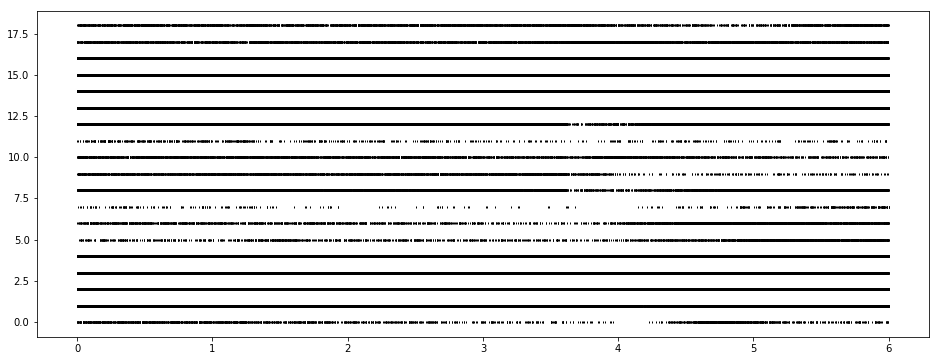

In [10]:
# plot
# spike raster
fig, ax = plt.subplots(1, 1, figsize=(16,6))
ax.plot(u_spk, u_idx , '|k', markersize=2)

In [11]:
units = (extracellular.UnitSpikeTimes & 'session_id="HI115_10061"' & 'unit_depth < 500')
units

subject_id id of the subject (e.g. ANM244028),session_time session time,session_id,probe_name String naming probe model,channel_counts number of channels in the probe,brain_region,brain_subregion,cortical_layer layer within cortex,hemisphere,unit_id,channel_id id of a channel on the probe,"spike_times (s) time of each spike, with respect to the start of session","unit_cell_type e.g. cell-type of this unit (e.g. wide width, narrow width spiking)","unit_spike_width (ms) spike width of this unit, from bottom peak to next positive peak or time point spike terminates",unit_depth (mm),spike_waveform waveform(s) of each spike at each spike time (spike_time x waveform_timestamps)
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,9,11,=BLOB=,N/A,0.92,399.847,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,10,11,=BLOB=,N/A,0.88,307.914,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,11,11,=BLOB=,N/A,0.84,292.203,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,17,43,=BLOB=,N/A,0.92,442.145,=BLOB=
anm332365,2016-10-06 00:00:00,HI115_10061,A2x32-8mm-25-250-165,64,ALM,N/A,N/A,left,18,43,=BLOB=,N/A,0.84,425.229,=BLOB=


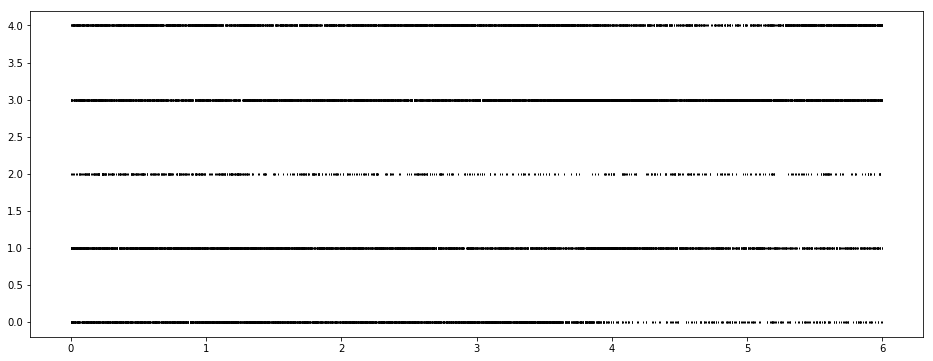

In [12]:
spiketimes = units.fetch('spike_times')
u_idx, u_spk = zip(*((np.full_like(r, ri), r)
                     for ri, r in enumerate(r for r in spiketimes if len(r) != 0)))
u_idx = np.hstack(u_idx)
u_spk = np.hstack(u_spk) 

# plot
# spike raster
fig, ax = plt.subplots(1, 1, figsize=(16,6))
ax.plot(u_spk, u_idx , '|k', markersize=2)